In [ ]:
import numpy as np
import pandas as pd

# **Read Dataset**

In [ ]:
df = pd.read_csv('listings.csv')
df.head(10)

,id,_ptype,_ltype,price,kabkoId,bedRooms,bathRooms,landSize,buildingSize,garages,sold
0,1.732279e+11,apartment,sale,9.120978e+08,618.0,1.0,1.0,0.0,NaN,0.0,no
1,1.277775e+11,house,rent,3.084582e+07,NaN,5.0,5.0,150.0,174.0,0.0,no
2,1.642203e+11,apartment,sale,9.806484e+08,608.0,3.0,2.0,0.0,51.0,0.0,NaN
3,9.846768e+10,apartment,sale,2.403327e+08,618.0,NaN,1.0,0.0,16.0,0.0,no
4,3.503346e+10,NaN,sale,1.200992e+09,618.0,3.0,2.0,136.0,93.0,0.0,no
5,1.203839e+11,house,sale,2.160444e+09,608.0,3.0,3.0,96.0,108.0,0.0,no
6,1.206510e+13,house,NaN,8.804793e+08,608.0,3.0,2.0,55.0,97.0,0.0,no
7,7.053384e+12,house,sale,7.108633e+08,608.0,3.0,2.0,42.0,42.0,0.0,no
8,1.556970e+11,apartment,sale,7.911829e+09,608.0,NaN,4.0,0.0,212.0,NaN,no
9,8.886038e+10,apartment,sale,1.761343e+08,618.0,1.0,1.0,0.0,18.0,0.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            957 non-null    float64
 1   _ptype        947 non-null    object 
 2   _ltype        951 non-null    object 
 3   price         958 non-null    float64
 4   kabkoId       953 non-null    float64
 5   bedRooms      948 non-null    float64
 6   bathRooms     945 non-null    float64
 7   landSize      954 non-null    float64
 8   buildingSize  937 non-null    float64
 9   garages       954 non-null    float64
 10  sold          854 non-null    object 
dtypes: float64(8), object(3)
memory usage: 86.1+ KB


# **Preprocessing Data**

In [ ]:
df.drop(columns=['id', '_ltype', 'garages'], inplace=True)
filtered_df = df[(df['sold'] != 'no') & (df['sold'].notna())]
filtered_df.head()

,_ptype,price,kabkoId,bedRooms,bathRooms,landSize,buildingSize,sold
15,house,3.600645e+09,618.0,3.0,3.0,236.0,255.0,yes
27,house,7.534672e+08,608.0,2.0,2.0,39.0,34.0,yes
30,house,2.000244e+09,618.0,3.0,3.0,121.0,135.0,yes
31,house,9.169497e+08,608.0,3.0,3.0,68.0,69.0,yes
32,house,1.080866e+09,608.0,2.0,2.0,49.0,52.0,yes


Drop the column are not requested by project team, such as ‘Id, _ltypes, garages’ and eliminate every data property data that are not sold

Statistical Description

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

stat_desc = filtered_df
# Statistical description
stat_desc['price'] = stat_desc['price'] / 1000000
stat_desc.rename(columns={'price': 'price(M)'}, inplace=True)
summary = round(stat_desc.describe(), 2)
print("Statistical Summary:\n", summary)

summary_df = pd.DataFrame(summary)
summary_df.to_csv('statistical_summary.csv', index=True)

Statistical Summary:
        price(M)  kabkoId  bedRooms  bathRooms  landSize  buildingSize
count    163.00   162.00    156.00     158.00    159.00        162.00
mean    1910.51   614.73      3.07       2.47    113.94        141.62
std     2234.99     4.71      1.05       1.30     97.09        282.75
min        0.29   608.00      1.00      -1.00      0.00          0.00
25%      480.18   608.00      2.00       2.00     51.00         45.00
50%     1120.91   618.00      3.00       2.00     89.00         90.00
75%     2540.40   618.00      4.00       3.00    153.00        164.75
max    12800.79   618.00      5.00       7.00    547.00       3483.00


<ipython-input-268-a8b9cfe37f97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_desc['price'] = stat_desc['price'] / 1000000
<ipython-input-268-a8b9cfe37f97>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat_desc.rename(columns={'price': 'price(M)'}, inplace=True)


We can see that the results of this statistical summary can show the value of count, standard deviation, mean, min, quartile 1,2,3 which is divided into 25%, 50% and 75% and then there is the max of each column which is numerical. From this statistical summary, it can also be seen that there are weird values in the bathRooms column

Check Missing Values

In [ ]:
# Check for missing values in each column
missing_values = filtered_df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(filtered_df)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)


Missing values per column:
 _ptype           8
price(M)         6
kabkoId          7
bedRooms        13
bathRooms       11
landSize        10
buildingSize     7
sold             0
dtype: int64

Percentage of missing values per column:
 _ptype          4.733728
price(M)        3.550296
kabkoId         4.142012
bedRooms        7.692308
bathRooms       6.508876
landSize        5.917160
buildingSize    4.142012
sold            0.000000
dtype: float64


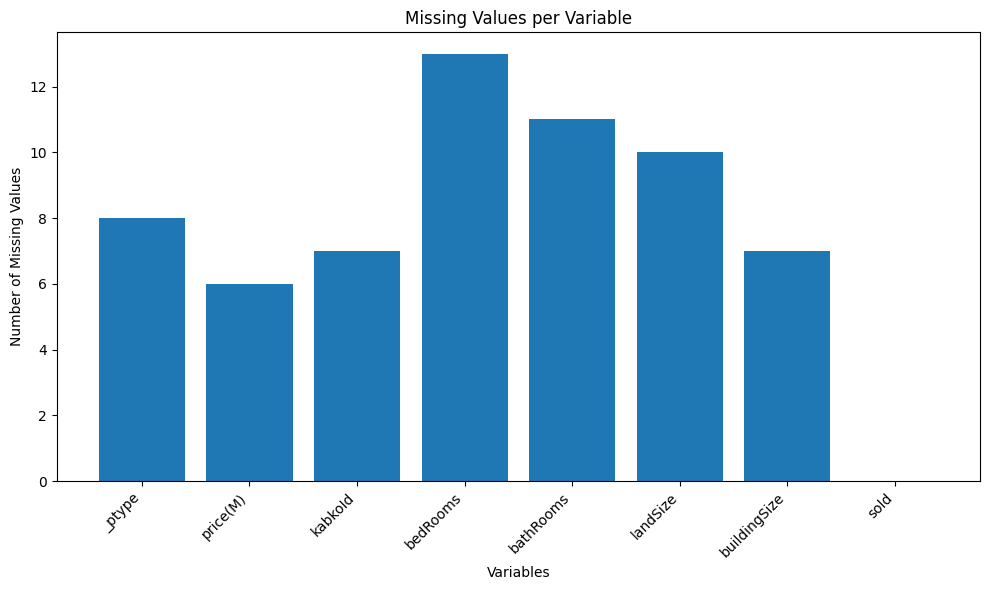

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Variable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

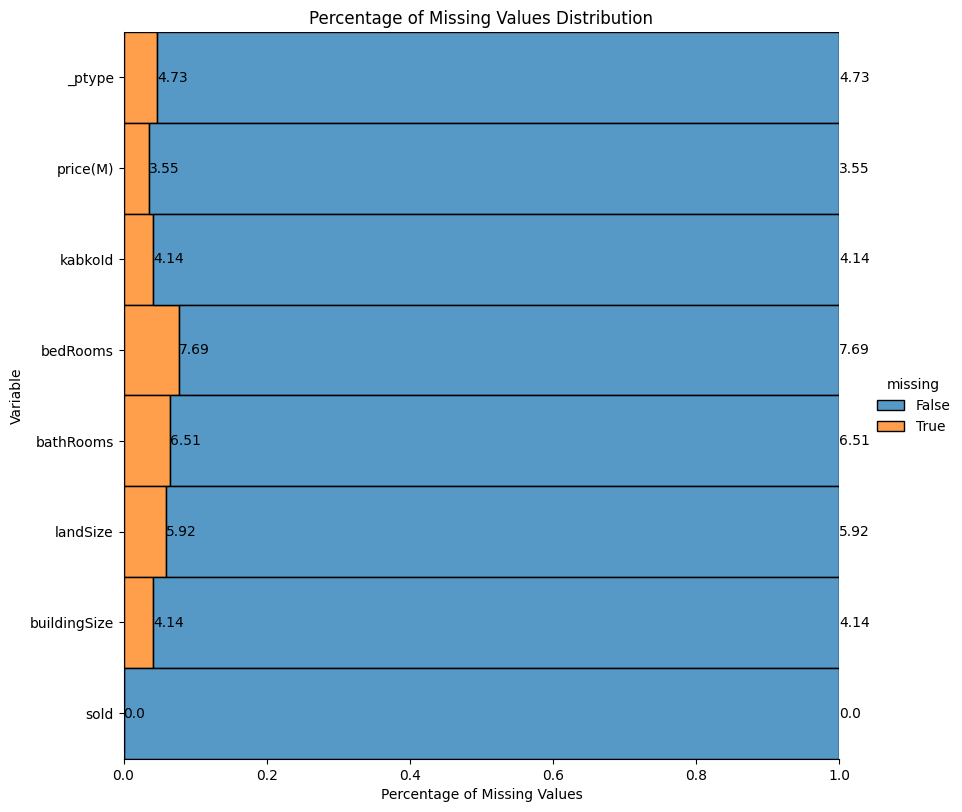

In [ ]:
plot = sns.displot(
    data=filtered_df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)
ax = plot.axes[0, 0]

containers = ax.containers

for container in containers:
    labels = round((missing_values / len(filtered_df)) * 100, 2)
    ax.bar_label(container, labels=labels)

plt.title('Percentage of Missing Values Distribution')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(filtered_df[['price(M)', 'kabkoId', 'bedRooms', 'bathRooms', 'landSize', 'buildingSize']])
filtered_df[['price(M)', 'kabkoId', 'bedRooms', 'bathRooms', 'landSize', 'buildingSize']] = imputer.transform(filtered_df[['price(M)', 'kabkoId', 'bedRooms', 'bathRooms', 'landSize', 'buildingSize']])

<ipython-input-272-f52c59f77a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['price(M)', 'kabkoId', 'bedRooms', 'bathRooms', 'landSize', 'buildingSize']] = imputer.transform(filtered_df[['price(M)', 'kabkoId', 'bedRooms', 'bathRooms', 'landSize', 'buildingSize']])


Since the result of missing values in each column is less than 10%, we conclude that it is possible to use an imputer by filling in the mean value for the part of the data that is NaN or null

In [ ]:
weird_prices = filtered_df[filtered_df['bathRooms'] < 0]
print("\nWeird bathRooms:\n", weird_prices)


Weird bathRooms:
         _ptype  price(M)  kabkoId  bedRooms  bathRooms  landSize  \
515  apartment  0.285519    618.0  3.070513       -1.0       0.0   
861      house  0.893433    618.0  3.070513       -1.0       0.0   

     buildingSize sold  
515    141.617284  yes  
861      0.000000  yes  


In [ ]:
filtered_df['bathRooms'] = filtered_df['bathRooms'].clip(lower=0)

<ipython-input-274-32467c395371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bathRooms'] = filtered_df['bathRooms'].clip(lower=0)


as before because the statistical summary already shows the existence of weird values in the bathRooms column which shows the number -1.00 even though this bathRooms shows the unit which is definitely not a minus value, so we changed the bathRooms column with the lower = 0.

In [ ]:
num_duplicates = filtered_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In this dataset, there are no duplicate values between the rows